In [1]:
file_content = ""
with open('pg244.txt', 'r', encoding='utf-8') as file:
    file_content = file.read()

Now we have to limit the file to the actual book and cut out the project gutenberg header and footer

In [2]:
book_content = file_content.split("***")[2]

Now we can split this book into list fo words while turning all letters to klower case and removing all puncuations

In [3]:
import re
book_content = re.sub('(\W|_)', ' ', book_content)
words = book_content.lower().split()

<>:2: SyntaxWarning: invalid escape sequence '\W'
<>:2: SyntaxWarning: invalid escape sequence '\W'
/tmp/nix-shell.sGfkJl/ipykernel_11562/4174425205.py:2: SyntaxWarning: invalid escape sequence '\W'
  book_content = re.sub('(\W|_)', ' ', book_content)


Now that the we have a list of all words we should  filter stop words out of it

In [4]:
stop_words = set()
with open('stop_words.txt', 'r', encoding='utf-8') as file:
    file_content = file.read()
    stop_words = set(file_content.splitlines())

filtered_words = [word for word in words if word not in stop_words]

We also can filter out different forms of the same word<br>
But I decided not to as it was filtering out main word "Holmes"

In [5]:
# from stemming.porter2 import stem
# filtered_words = [ stem ( word ) for word in filtered_words ]

Next step is to count frequency of each individual word and sort descending

In [6]:
pairs = [(w , 1 ) for w in filtered_words ]

from itertools import groupby
pairs.sort()
word = lambda pair: pair [0]
grouped_pairs = [(w, sum(1 for _ in g) ) for w, g in groupby(pairs, key = word)]
grouped_pairs.sort(key = lambda pair : pair [1], reverse = True)
print(grouped_pairs[:25])


[('said', 207), ('upon', 198), ('one', 163), ('man', 155), ('would', 123), ('holmes', 98), ('could', 97), ('little', 82), ('two', 79), ('time', 77), ('come', 71), ('way', 70), ('well', 68), ('came', 67), ('face', 67), ('asked', 65), ('drebber', 62), ('ferrier', 62), ('see', 61), ('answered', 59), ('eyes', 59), ('hand', 57), ('room', 57), ('hope', 56), ('found', 55)]


As said in the exerscize descriptions the first few words are not important as they are just commonly used words, not meaningful<br>
We will filter this words and save the rest to .txt file

Removed words:  [('said', 207), ('upon', 198), ('one', 163), ('man', 155), ('would', 123)]


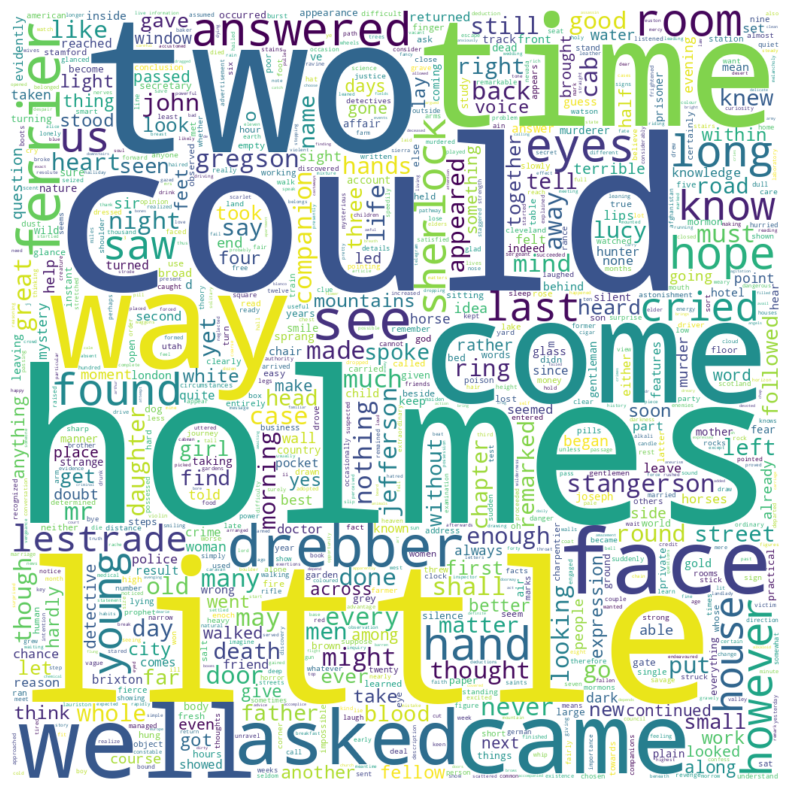

In [7]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

print("Removed words: ",grouped_pairs[:5])
wc = WordCloud(width=1024, height=1024, background_color='white', max_words=1000).generate_from_frequencies(dict(grouped_pairs[5:]))
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.savefig('wordcloud5.png', format='png', dpi=300, bbox_inches='tight', pad_inches=0)